# Titanic Survival Predictions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The sinking of the Titanic resulted in the death of 1502 out of 2224 passengers and crew.
We need to create a model that predicts which passengers were more likely to survive using passenger data like age, gender, socio-economic class, etc.

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
#etc

#your info here
__author__ = "Daniela Alvarez"
__email__ = "daniela.alvarez04@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe

def load_file(file):
    return pd.read_csv(file)

In [3]:
print("Loading data")

train_df = load_file('data/train.csv')
test_df = load_file('data/test.csv')

Loading data


### ---- 3 Clean the data ----

In [4]:
#look for duplicate data, invalid data, or corrupt data and remove it
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.duplicated().sum()

0

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_df.duplicated().sum()

0

In [9]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Quick, Mrs. Frederick Charles (Jane Richards)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
#Delete irrelevant variables like name and ticket number. Cabin was erased because it has a 77% of missing values.

del train_df["Name"]
del train_df["Ticket"]
del train_df["Cabin"]
del test_df["Name"]
del test_df["Ticket"]
del test_df["Cabin"]

In [11]:
train_df = train_df.dropna(subset=["Embarked"])

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Sex' and 'Embarked'. 
train_df['Sex']= label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked']= label_encoder.fit_transform(train_df['Embarked'])
print(train_df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


In [13]:
#there are 176 Nan in Age feature so we will impute those values.
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [14]:
imputer.fit(train_df)

SimpleImputer(strategy='median')

In [15]:
imputer.statistics_

array([446.    ,   0.    ,   3.    ,   1.    ,  28.    ,   0.    ,
         0.    ,  14.4542,   2.    ])

In [16]:
train_df.median().values

array([446.    ,   0.    ,   3.    ,   1.    ,  28.    ,   0.    ,
         0.    ,  14.4542,   2.    ])

In [17]:
X = imputer.transform(train_df)

In [18]:
train_df_tr = pd.DataFrame(X, columns=train_df.columns)

In [19]:
corr_matrix = train_df_tr.corr()

In [20]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.255290
Parch          0.083151
PassengerId   -0.005028
SibSp         -0.034040
Age           -0.069822
Embarked      -0.169718
Pclass        -0.335549
Sex           -0.541585
Name: Survived, dtype: float64

There is a strong correlation with Sex and PClass, and it makes sense that Pclass 1 (in this case the highest passenger class) has the highest prices (strong correlation between Fare and PClass)

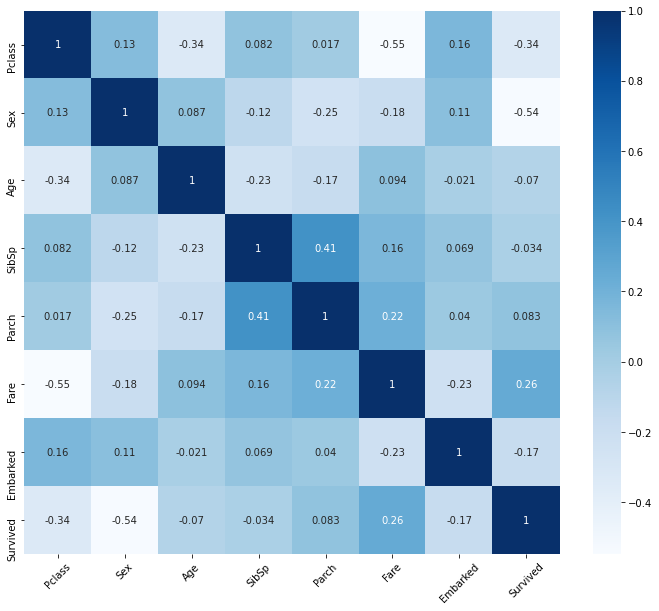

In [26]:
#Look for correlation between each feature and the target
#Look for correlation between features
#PassengerId is discarded for having unique values.

fig = plt.figure(figsize=(12,10))
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
sns.heatmap(train_df_tr[features + ['Survived']].corr(), cmap = 'Blues', annot=True)
plt.xticks(rotation = 45)
plt.show()

According to this graph Survival depends a lot of Passenger's sex and the PClass passenger traveled in.

In [27]:
def get_df(df, var):
    return df[var]

In [30]:
target_var = ['Survived']

In [32]:
target_df = get_df(train_df_tr, target_var)
features_df = get_df(train_df_tr, features)

## Training Models

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

In [34]:
train_survived = (target_df == 1)   #True for all 1s

In [33]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, train_survived)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth = 6)
tree_clf.fit(features_df, target_df)

In [ ]:
predictions = tree.predict(features_df)

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data